In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_allclose
pd.options.mode.copy_on_write = True # trigger immutable behavior

dataset = pd.read_csv('../datasets/Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values

0

0

[[ 15  39   4]
 [ 15  81   2]
 [ 16   6   4]
 [ 16  77   2]
 [ 17  40   4]
 [ 17  76   2]
 [ 18   6   4]
 [ 18  94   2]
 [ 19   3   4]
 [ 19  72   2]
 [ 19  14   4]
 [ 19  99   2]
 [ 20  15   4]
 [ 20  77   2]
 [ 20  13   4]
 [ 20  79   2]
 [ 21  35   4]
 [ 21  66   2]
 [ 23  29   4]
 [ 23  98   2]
 [ 24  35   4]
 [ 24  73   2]
 [ 25   5   4]
 [ 25  73   2]
 [ 28  14   4]
 [ 28  82   2]
 [ 28  32   4]
 [ 28  61   2]
 [ 29  31   4]
 [ 29  87   2]
 [ 30   4   4]
 [ 30  73   2]
 [ 33   4   4]
 [ 33  92   2]
 [ 33  14   4]
 [ 33  81   2]
 [ 34  17   4]
 [ 34  73   2]
 [ 37  26   4]
 [ 37  75   2]
 [ 38  35   4]
 [ 38  92   2]
 [ 39  36   4]
 [ 39  61   0]
 [ 39  28   4]
 [ 39  65   2]
 [ 40  55   0]
 [ 40  47   0]
 [ 40  42   0]
 [ 40  42   0]
 [ 42  52   0]
 [ 42  60   0]
 [ 43  54   0]
 [ 43  60   0]
 [ 43  45   0]
 [ 43  41   0]
 [ 44  50   0]
 [ 44  46   0]
 [ 46  51   0]
 [ 46  46   0]
 [ 46  56   0]
 [ 46  55   0]
 [ 47  52   0]
 [ 47  59   0]
 [ 48  51   0]
 [ 48  59   0]
 [ 48  50 

0

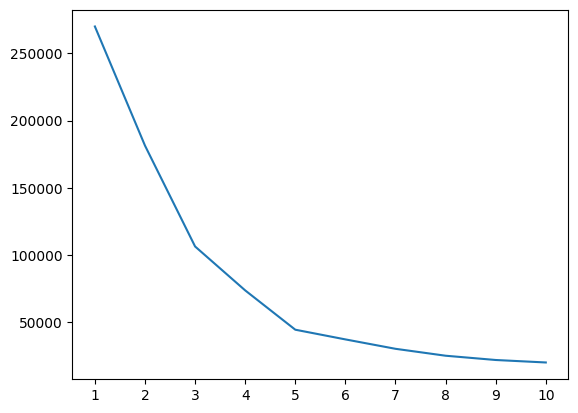

In [52]:
from sklearn.cluster import KMeans

wcss = []

# numberOfClusterOptions = range(1, 11)
number_of_cluster_options = np.arange(1, 11, 1)

for clusterCount in number_of_cluster_options:  
  kmeans = KMeans(clusterCount, init="k-means++", random_state=42, n_init=5)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plot.plot(number_of_cluster_options, wcss)
plot.xticks(number_of_cluster_options)

# elbow = 5
optimal_number_of_clusters = 5
kmeans = KMeans(optimal_number_of_clusters, init="k-means++", random_state=42, n_init=5)
kmeans.fit(X)
y = kmeans.fit_predict(X)

cluster_ids = kmeans.labels_
X_clusterized = np.column_stack((X, cluster_ids))
print(X_clusterized)

0

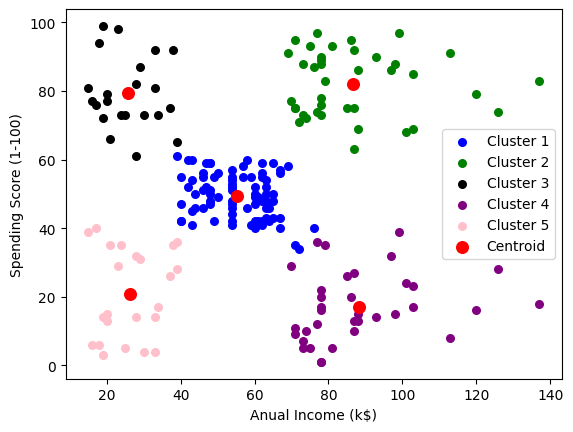

In [72]:
colors = ['blue', 'green', 'black', 'purple', 'pink']

for i in np.arange(0, optimal_number_of_clusters):
  idx = np.where(cluster_ids == i)
  plot.scatter(X[idx, 0], X[idx, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
  
plot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='red', label=f'Centroid')

plot.xlabel('Anual Income (k$)')
plot.ylabel('Spending Score (1-100)')

plot.legend()
plot.show()